In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import os

# Function to get the directory of the current script
def get_script_dir():
    try:
        script_dir = os.path.dirname(os.path.abspath(__file__))
    except NameError:
        script_dir = os.getcwd()
    return script_dir

# Get the directory of the current script
script_dir = get_script_dir()

# Construct the relative path to the Excel file
file_path = os.path.join(script_dir, "SmartphoneLogistics.xlsx")

# Load the data
xls = pd.ExcelFile(file_path)

# DataFrames
i = pd.read_excel(xls, 'Inventory')
o = pd.read_excel(xls, 'Orders')
pa = pd.read_excel(xls, 'Parts')
s = pd.read_excel(xls, 'Suppliers')
w = pd.read_excel(xls, 'Warehouses')

# Convert OrderDate and DeliveryDate columns to datetime
o['OrderDate'] = pd.to_datetime(o['OrderDate'], errors='coerce')
o['DeliveryDate'] = pd.to_datetime(o['DeliveryDate'], errors='coerce')

# Handle missing values for DeliveryDate
o['DeliveryDate'] = o['DeliveryDate'].fillna(pd.NaT)

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\openpy

# Data Description and Initial Exploration


# נתוני מלאי ראשוניים
נתונים אלו מראים את השורות הראשונות של טבלת המלאי. ניתן לראות את מזהי המלאי, מזהי החלקים, מזהי המחסנים, הכמויות הזמינות ותאריכי העדכון האחרון של המלאי.


In [20]:
# Display the first few rows of each DataFrame
i.head()

InventoryID  PartID  WarehouseID  QuantityAvailable     LastStockUpdate  \
0            1      26           19                910 2024-02-24 09:10:05   
1            2      51            7                576 2020-02-18 13:07:22   
2            3      52           22                973 2021-02-18 17:29:57   
3            4       5           22                354 2021-10-18 07:01:59   
4            5      53           22                313 2020-01-03 20:27:56   

   MinStockThreshold  MaxStockThreshold  
0                 84                759  
1                  5                681  
2                 11                958  
3                190                375  
4                302               1298


# נתוני הזמנות ראשוניים
נתונים אלו מציגים את השורות הראשונות של טבלת ההזמנות. ניתן לראות את מזהי ההזמנות, מזהי החלקים שהוזמנו, כמות ההזמנות, תאריכי ההזמנה והאספקה ומצב ההזמנה.


In [21]:
o.head()

OrderID  PartID  QuantityOrdered  OrderDate DeliveryDate OrderStatus  \
0        1      13               47 2024-03-30   2024-04-03   Delivered   
1        2      49               91 2023-11-10          NaT     Pending   
2        3      17               52 2023-05-24          NaT     Pending   
3        4       4               18 2022-10-05   2022-10-06   Delivered   
4        5      57               39 2023-08-17   2023-08-22  In Transit   

     ShippingMethod TrackingNumber         StreetAddress  FloorNumber  \
0   Postal Services      TN-445850       15 Herzl Street          2.0   
1  Freight Shipping      TN-764041       8 HaShalom Road          9.0   
2   Ground Shipping      TN-670116  44 Ben Yehuda Street          NaN   
3      Air Shipping      TN-206508    9 HaReuveni Street          NaN   
4  Express Shipping      TN-954723  72 Rothschild Street          5.0   

  ApartmentNumber           City PostalCode Country  
0              3A       Tel Aviv      64372  Israel  
1               B      Jerusalem      93647  Israel  
2             NaN       Tel Aviv      68137  Israel  
3             NaN      Beersheba      85635  Israel  
4              1B  Rishon LeZion      75236  Israel


# נתוני חלקים ראשוניים
נתונים אלו מציגים את השורות הראשונות של טבלת החלקים. ניתן לראות את מזהי החלקים, שמות החלקים, תיאור החלקים, כמות החלקים ועלות החלקים.


In [22]:
pa.head()

PartID                   PartName  \
0       1       Snapdragon Processor   
1       2           Exynos Processor   
2       3           LG ThinQ AI Chip   
3       4      Vivo V Series Battery   
4       5  iPhone OLED Display Panel   

                                     PartDescription  PartQuantity  \
0                  High-performance mobile processor           100   
1           Mobile processor for Samsung smartphones           110   
2        Artificial intelligence chip for LG devices           120   
3  Replacement battery for Vivo V series smartphones           130   
4     High-resolution OLED display panel for iPhones           140   

   SupplierID  UnitCost LastRestockDate  
0           1       200      2024-04-15  
1           2       180      2024-04-03  
2           3       150      2024-04-10  
3           4        50      2024-04-07  
4           5       300      2024-04-12


# נתוני ספקים ראשוניים
נתונים אלו מציגים את השורות הראשונות של טבלת הספקים. ניתן לראות את מזהי הספקים, שמות הספקים, כתובות, ערים, קודים פוסטליים, מדינות, איש קשר, אימייל, טלפון, דירוג ושיטת השילוח המועדפת.


In [23]:
s.head()

SupplierID                            SupplierName  \
0           1                                Qualcomm   
1           2                     Samsung Electronics   
2           3                          LG Electronics   
3           4  Vivo Communication Technology Co. Ltd.   
4           5                              Apple Inc.   

                                       StreetAddress       City PostalCode  \
0                               5775 Morehouse Drive  San Diego      92121   
1                       129 Samsung-ro, Yeongtong-gu      Suwon      16677   
2                   128 Yeoui-daero, Yeongdeungpo-gu      Seoul      07336   
3  No. 1606, Kechuang Building, Hongsong Road, Hi...   Dongguan     523850   
4                                   1 Apple Park Way  Cupertino      95014   

       Country ContactPerson       ContactEmail         ContactPhone  Rating  \
0          USA    John Smith  john@qualcomm.com    (+1) 858-587-1121       4   
1  South Korea      Jane Doe   jane@samsung.com   (+82) 31-2001-1111       5   
2  South Korea  Mike Johnson        mike@lg.com    (+82) 2-3777-7114       4   
3        China   Michael Lee   michael@vivo.com  (+86) 769-3889-9399       3   
4          USA     Sarah Lee    sarah@apple.com    (+1) 408-996-1010       5   

  PreferredShippingMethod  
0         Ground Shipping  
1            Air Shipping  
2        Freight Shipping  
3        Freight Shipping  
4        Express Shipping


# נתוני מחסנים ראשוניים
נתונים אלו מציגים את השורות הראשונות של טבלת המחסנים. ניתן לראות את מזהי המחסנים, ערים בהן נמצאים המחסנים, מדינות, קיבולת המחסנים, שמות המנהלים וטלפונים.


In [24]:
w.head()

WarehouseID WarehouseCity WarehouseCountry  WarehouseCapacity  \
0            1      Tel Aviv           Israel              50000   
1            2         Seoul      South Korea              60000   
2            3       Beijing            China              45000   
3            4         Tokyo            Japan              37500   
4            5     New Delhi            India              45000   

  WarehouseManager       WarehousePhone  
0        Avi Cohen   (+972) 50-123-4567  
1        Park Joon   (+82) 10-1234-5678  
2           Li Wei  (+86) 138-1234-5678  
3   Yamada Takeshi   (+81) 90-1234-5678  
4        Raj Patel   (+91) 98-7654-3210


# מידע על הטבלאות
המידע מציג את מבנה הטבלאות כולל שמות העמודות, סוגי הנתונים ומספר הערכים בכל עמודה.


In [25]:
# Display information about the DataFrames with Markdown headers and explanations
def display_info(df, name, description_he):
    display(Markdown(f"### {name} Table"))
    display(Markdown(description_he))
    df.info()
    print("\n")

# Descriptions
descriptions = {
    'Inventory': "טבלה זו מכילה מידע על המלאי של חלקים שונים במחסנים שונים. המידע חשוב לניהול רמות המלאי והבטחת זמינות חלקים.",
    'Orders': "טבלה זו עוקבת אחר הזמנות חלקים, כולל פרטי משלוח ומצב ההזמנה. המידע חשוב לניהול הזמנות ומשלוחים.",
    'Parts': "טבלה זו מכילה פרטים על חלקים שונים, כולל תיאורים ומידע על ספקים. המידע חשוב לניהול קטלוג החלקים והספקים.",
    'Suppliers': "טבלה זו כוללת רשימת ספקים, כולל פרטי התקשרות ודירוגים. המידע חשוב לבחירת ספקים וניהול קשרי ספקים.",
    'Warehouses': "טבלה זו מכילה מידע על מחסנים, כולל קיבולת ופרטי התקשרות. המידע חשוב לניהול מחסנים והבטחת קיבולת מספקת."
}

# Display information for each DataFrame
display_info(i, 'Inventory', descriptions['Inventory'])
display_info(o, 'Orders', descriptions['Orders'])
display_info(pa, 'Parts', descriptions['Parts'])
display_info(s, 'Suppliers', descriptions['Suppliers'])
display_info(w, 'Warehouses', descriptions['Warehouses'])

### Inventory Table

טבלה זו מכילה מידע על המלאי של חלקים שונים במחסנים שונים. המידע חשוב לניהול רמות המלאי והבטחת זמינות חלקים.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InventoryID        2322 non-null   int64         
 1   PartID             2322 non-null   int64         
 2   WarehouseID        2322 non-null   int64         
 3   QuantityAvailable  2322 non-null   int64         
 4   LastStockUpdate    2322 non-null   datetime64[ns]
 5   MinStockThreshold  2322 non-null   int64         
 6   MaxStockThreshold  2322 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 127.1 KB




### Orders Table

טבלה זו עוקבת אחר הזמנות חלקים, כולל פרטי משלוח ומצב ההזמנה. המידע חשוב לניהול הזמנות ומשלוחים.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          368 non-null    int64         
 1   PartID           368 non-null    int64         
 2   QuantityOrdered  368 non-null    int64         
 3   OrderDate        368 non-null    datetime64[ns]
 4   DeliveryDate     267 non-null    datetime64[ns]
 5   OrderStatus      368 non-null    object        
 6   ShippingMethod   368 non-null    object        
 7   TrackingNumber   368 non-null    object        
 8   StreetAddress    368 non-null    object        
 9   FloorNumber      164 non-null    float64       
 10  ApartmentNumber  164 non-null    object        
 11  City             368 non-null    object        
 12  PostalCode       368 non-null    object        
 13  Country          368 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(3)

### Parts Table

טבלה זו מכילה פרטים על חלקים שונים, כולל תיאורים ומידע על ספקים. המידע חשוב לניהול קטלוג החלקים והספקים.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PartID           186 non-null    int64 
 1   PartName         186 non-null    object
 2   PartDescription  186 non-null    object
 3   PartQuantity     186 non-null    int64 
 4   SupplierID       186 non-null    int64 
 5   UnitCost         186 non-null    int64 
 6   LastRestockDate  186 non-null    object
dtypes: int64(4), object(3)
memory usage: 10.3+ KB




### Suppliers Table

טבלה זו כוללת רשימת ספקים, כולל פרטי התקשרות ודירוגים. המידע חשוב לבחירת ספקים וניהול קשרי ספקים.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   SupplierID               30 non-null     int64 
 1   SupplierName             30 non-null     object
 2   StreetAddress            30 non-null     object
 3   City                     30 non-null     object
 4   PostalCode               30 non-null     object
 5   Country                  30 non-null     object
 6   ContactPerson            30 non-null     object
 7   ContactEmail             30 non-null     object
 8   ContactPhone             30 non-null     object
 9   Rating                   30 non-null     int64 
 10  PreferredShippingMethod  30 non-null     object
dtypes: int64(2), object(9)
memory usage: 2.7+ KB




### Warehouses Table

טבלה זו מכילה מידע על מחסנים, כולל קיבולת ופרטי התקשרות. המידע חשוב לניהול מחסנים והבטחת קיבולת מספקת.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   WarehouseID        28 non-null     int64 
 1   WarehouseCity      28 non-null     object
 2   WarehouseCountry   28 non-null     object
 3   WarehouseCapacity  28 non-null     int64 
 4   WarehouseManager   28 non-null     object
 5   WarehousePhone     28 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.4+ KB





# סטטיסטיקות כלליות על הטבלאות
הסטטיסטיקות מציגות מידע כמו ממוצעים, סטיות תקן, מינימום, מקסימום וכמות הערכים בכל עמודה.


In [26]:
# descriptions focusing on business strengths
stat_descriptions = {
    'Inventory': "סטטיסטיקות המלאי מאפשרות לנהל מלאי באופן יעיל, עם איזון מדויק בין כמויות מינימום ומקסימום של מלאי בכל מחסן. היכולת לעקוב אחר המלאי באופן מדויק מבטיחה זמינות חלקים מתמשכת ומונעת חוסרים.",
    'Orders': "סטטיסטיקות ההזמנות מדגישות את היכולת לעמוד בזמני אספקה ולהגיב במהירות להזמנות חדשות. תאריכי ההזמנה והמשלוח מראים על יעילות תהליך ההזמנה והמשלוח.",
    'Parts': "הסטטיסטיקות על החלקים מצביעות על מגוון רחב של חלקים זמינים ועל היכולת לשמור על עלויות נמוכות. המדדים מראים על היכולת לנהל מלאי בצורה חסכונית ויעילה.",
    'Suppliers': "סטטיסטיקות הספקים מדגישות את איכות הספקים שאיתם עובדים. דירוגי הספקים ושיטות המשלוח המועדפות מראים על השותפויות האסטרטגיות העיסקיות ועל היכולת לקבל מוצרים איכותיים במהירות ובאמינות.",
    'Warehouses': "סטטיסטיקות המחסנים מדגישות את הקיבולת הגבוהה של המחסנים ואת היכולת לנהל כמות גדולה של מלאי. הנתונים מראים שיש תשתיות חזקות לניהול ואחסון אפקטיבי של מלאי."
}

# Display general statistics about the DataFrames with explanations
def display_stats(df, name, description_he):
    display(Markdown(f"### {name} Table"))
    display(Markdown(description_he))
    display(df.describe())
    print("\n")

# Display statistics for each DataFrame
display_stats(i, 'Inventory', stat_descriptions['Inventory'])
display_stats(o, 'Orders', stat_descriptions['Orders'])
display_stats(pa, 'Parts', stat_descriptions['Parts'])
display_stats(s, 'Suppliers', stat_descriptions['Suppliers'])
display_stats(w, 'Warehouses', stat_descriptions['Warehouses'])

### Inventory Table

סטטיסטיקות המלאי מאפשרות לנהל מלאי באופן יעיל, עם איזון מדויק בין כמויות מינימום ומקסימום של מלאי בכל מחסן. היכולת לעקוב אחר המלאי באופן מדויק מבטיחה זמינות חלקים מתמשכת ומונעת חוסרים.

InventoryID       PartID  WarehouseID  QuantityAvailable  \
count  2322.000000  2322.000000  2322.000000        2322.000000   
mean   1161.500000    32.248062    14.449612         502.396641   
min       1.000000     1.000000     1.000000           1.000000   
25%     581.250000    17.000000     8.000000         246.000000   
50%    1161.500000    32.000000    14.000000         511.500000   
75%    1741.750000    48.000000    21.000000         758.000000   
max    2322.000000    62.000000    28.000000         998.000000   
std     670.447985    18.094837     7.958602         295.450189   

                     LastStockUpdate  MinStockThreshold  MaxStockThreshold  
count                           2322        2322.000000        2322.000000  
mean   2021-09-29 17:34:03.846253056         237.094315         732.042636  
min              2019-01-01 22:43:21           0.000000          18.000000  
25%              2020-04-30 15:41:38         108.000000         474.000000  
50%              2021-10-28 16:01:38         233.000000         738.500000  
75%              2023-02-14 20:06:06         360.000000         983.000000  
max              2024-04-21 00:43:47         499.000000        1488.000000  
std                              NaN         145.906851         320.392534

### Orders Table

סטטיסטיקות ההזמנות מדגישות את היכולת לעמוד בזמני אספקה ולהגיב במהירות להזמנות חדשות. תאריכי ההזמנה והמשלוח מראים על יעילות תהליך ההזמנה והמשלוח.

OrderID      PartID  QuantityOrdered                      OrderDate  \
count  368.000000  368.000000       368.000000                            368   
mean   184.500000   29.133152        47.138587  2023-06-06 00:58:41.739130368   
min      1.000000    1.000000         3.000000            2022-05-19 00:00:00   
25%     92.750000   11.000000        23.750000            2023-01-10 00:00:00   
50%    184.500000   32.000000        47.000000            2023-05-21 00:00:00   
75%    276.250000   48.000000        66.000000            2023-12-14 00:00:00   
max    368.000000   62.000000        97.000000            2024-04-21 00:00:00   
std    106.376689   19.521279        24.982824                            NaN   

                        DeliveryDate  FloorNumber  
count                            267   164.000000  
mean   2023-05-11 18:20:13.483145984     5.091463  
min              2022-05-24 00:00:00     1.000000  
25%              2023-01-16 00:00:00     3.000000  
50%              2023-05-13 00:00:00     5.000000  
75%              2023-10-13 00:00:00     7.000000  
max              2024-04-26 00:00:00     9.000000  
std                              NaN     2.441497

### Parts Table

הסטטיסטיקות על החלקים מצביעות על מגוון רחב של חלקים זמינים ועל היכולת לשמור על עלויות נמוכות. המדדים מראים על היכולת לנהל מלאי בצורה חסכונית ויעילה.

PartID  PartQuantity  SupplierID     UnitCost
count  186.000000    186.000000  186.000000   186.000000
mean    93.500000    518.709677   14.838710    74.725806
std     53.837719    294.261240    9.293753   131.251832
min      1.000000    100.000000    1.000000     5.000000
25%     47.250000    280.000000    6.000000    20.000000
50%     93.500000    455.000000   16.000000    40.000000
75%    139.750000    810.000000   23.000000    80.000000
max    186.000000   1080.000000   29.000000  1000.000000

### Suppliers Table

סטטיסטיקות הספקים מדגישות את איכות הספקים שאיתם עובדים. דירוגי הספקים ושיטות המשלוח המועדפות מראים על השותפויות האסטרטגיות העיסקיות ועל היכולת לקבל מוצרים איכותיים במהירות ובאמינות.

SupplierID     Rating
count   30.000000  30.000000
mean    15.500000   3.966667
std      8.803408   1.066200
min      1.000000   1.000000
25%      8.250000   3.250000
50%     15.500000   4.000000
75%     22.750000   5.000000
max     30.000000   5.000000

### Warehouses Table

סטטיסטיקות המחסנים מדגישות את הקיבולת הגבוהה של המחסנים ואת היכולת לנהל כמות גדולה של מלאי. הנתונים מראים שיש תשתיות חזקות לניהול ואחסון אפקטיבי של מלאי.

WarehouseID  WarehouseCapacity
count    28.000000          28.000000
mean     14.500000       51291.071429
std       8.225975       21251.361846
min       1.000000       35000.000000
25%       7.750000       40900.000000
50%      14.500000       46750.000000
75%      21.250000       54337.500000
max      28.000000      150000.000000

# Data Analysis and Visualizations


# מלאי נמוך
הניתוח מציג את הפריטים שהזמינות שלהם נמוכה מסף המינימום שנקבע. נתונים אלו חשובים כדי לדעת אילו פריטים יש לחדש במלאי בהקדם.


In [27]:
# Inventory Analysis
# Check stock levels and identify items below the minimum threshold
low_stock = i[i['QuantityAvailable'] < i['MinStockThreshold']]
low_stock

InventoryID  PartID  WarehouseID  QuantityAvailable     LastStockUpdate  \
5               6      41           12                158 2023-10-21 23:06:30   
6               7      35           19                165 2024-04-21 00:43:47   
12             13      17           19                 48 2022-10-18 10:59:42   
18             19      26            2                 19 2023-01-22 06:55:32   
23             24      53            2                369 2023-11-23 03:24:10   
...           ...     ...          ...                ...                 ...   
2309         2310      41           21                 45 2020-05-18 17:36:15   
2311         2312      57            4                 28 2024-02-10 07:52:43   
2315         2316       4            8                130 2024-01-02 08:44:18   
2319         2320      11           19                237 2020-04-11 07:15:50   
2321         2322      28           23                404 2022-07-25 05:58:59   

      MinStockThreshold  MaxStockThreshold  
5                   296               1175  
6                   340                790  
12                  169                521  
18                  233                955  
23                  371               1068  
...                 ...                ...  
2309                 46                901  
2311                484                588  
2315                204                831  
2319                404                741  
2321                434               1227  

[567 rows x 7 columns]


# ניתוח מחזור מלאי
הניתוח מציג את כמות הימים שעברו מאז העדכון המלאי האחרון ואת שיעור מחזור המלאי (כמות זמינה חלקי מספר ימים מאז העדכון האחרון). נתונים אלו מסייעים לזהות אילו פריטים ובאיזו תדירות להזמינם (מהר או לאט).


In [28]:
# Inventory turnover analysis (assuming LastStockUpdate indicates the last time stock was added)
i['DaysSinceLastUpdate'] = (pd.Timestamp.now() - i['LastStockUpdate']).dt.days
i['TurnoverRate'] = i['QuantityAvailable'] / i['DaysSinceLastUpdate']
i[['PartID', 'WarehouseID', 'QuantityAvailable', 'DaysSinceLastUpdate', 'TurnoverRate']]

PartID  WarehouseID  QuantityAvailable  DaysSinceLastUpdate  \
0         26           19                910                  126   
1         51            7                576                 1593   
2         52           22                973                 1227   
3          5           22                354                  985   
4         53           22                313                 1638   
...      ...          ...                ...                  ...   
2317      59           22                279                 1619   
2318      42           15                709                  750   
2319      11           19                237                 1540   
2320      24           21                351                 1900   
2321      28           23                404                  705   

      TurnoverRate  
0         7.222222  
1         0.361582  
2         0.792991  
3         0.359391  
4         0.191087  
...            ...  
2317      0.172329  
2318      0.945333  
2319      0.153896  
2320      0.184737  
2321      0.573050  

[2322 rows x 5 columns]


# ניתוח ספקים
הניתוח מציג את ביצועי הספקים בהתבסס על מילוי הזמנות ודירוגים. נתונים אלו מסייעים להעריך את איכות השירות של הספקים.


In [29]:
# Supplier Analysis
# Evaluate supplier performance based on order fulfillment and ratings
supplier_performance = s[['SupplierName', 'Country', 'Rating']]
order_supplier = o.merge(pa[['PartID', 'SupplierID']], on='PartID')
supplier_orders = order_supplier.merge(s[['SupplierID', 'SupplierName']], on='SupplierID')
supplier_orders

OrderID  PartID  QuantityOrdered  OrderDate DeliveryDate OrderStatus  \
0          1      13               47 2024-03-30   2024-04-03   Delivered   
1          2      49               91 2023-11-10          NaT     Pending   
2          3      17               52 2023-05-24          NaT     Pending   
3          4       4               18 2022-10-05   2022-10-06   Delivered   
4          5      57               39 2023-08-17   2023-08-22  In Transit   
..       ...     ...              ...        ...          ...         ...   
363      364      53               53 2023-12-16   2023-12-19  In Transit   
364      365      49               12 2022-06-26   2022-06-29   Delivered   
365      366       2               82 2024-03-28          NaT   Cancelled   
366      367      39               14 2024-04-07          NaT  Processing   
367      368      56               97 2023-01-10   2023-01-16   Delivered   

       ShippingMethod TrackingNumber         StreetAddress  FloorNumber  \
0     Postal Services      TN-445850       15 Herzl Street          2.0   
1    Freight Shipping      TN-764041       8 HaShalom Road          9.0   
2     Ground Shipping      TN-670116  44 Ben Yehuda Street          NaN   
3        Air Shipping      TN-206508    9 HaReuveni Street          NaN   
4    Express Shipping      TN-954723  72 Rothschild Street          5.0   
..                ...            ...                   ...          ...   
363  Freight Shipping      TN-155866   2 Ben Gurion Street          4.0   
364  Courier Services      TN-136653    18 Weizmann Street          NaN   
365   Ground Shipping      TN-884308      7 HaDekel Street          5.0   
366   Ground Shipping      TN-900019     35 Wilhelmstrasse          4.0   
367  Express Shipping      TN-130653       8 Gordon Street          1.0   

    ApartmentNumber           City PostalCode  Country  SupplierID  \
0                3A       Tel Aviv      64372   Israel          15   
1                 B      Jerusalem      93647   Israel          27   
2               NaN       Tel Aviv      68137   Israel           4   
3               NaN      Beersheba      85635   Israel           4   
4                1B  Rishon LeZion      75236   Israel           2   
..              ...            ...        ...      ...         ...   
363               2         Ashdod      77452   Israel          28   
364             NaN          Haifa      34402   Israel          27   
365              2B    Petah Tikva      49512   Israel           2   
366              3B         Berlin      10117  Germany          20   
367               C      Jerusalem      93546   Israel           2   

                               SupplierName  
0                Meizu Technology Co., Ltd.  
1                  Foxconn Technology Group  
2    Vivo Communication Technology Co. Ltd.  
3    Vivo Communication Technology Co. Ltd.  
4                       Samsung Electronics  
..                                      ...  
363                         TCL Corporation  
364                Foxconn Technology Group  
365                     Samsung Electronics  
366                     Toshiba Corporation  
367                     Samsung Electronics  

[368 rows x 16 columns]


# ניתוח מילוי הזמנות
הניתוח מציג את זמני האספקה של ההזמנות ומזהה עיכובים פוטנציאליים (מעל 5 ימים). נתונים אלו חשובים כדי להבין את יעילות תהליך מילוי ההזמנות.


In [30]:
# Order Fulfillment Analysis
# Assess order delivery times and identify potential delays
o['DeliveryTime'] = (o['DeliveryDate'] - o['OrderDate']).dt.days
delayed_orders = o[o['DeliveryTime'] > 5]  # Assuming more than 5 days is a delay
delayed_orders

OrderID  PartID  QuantityOrdered  OrderDate DeliveryDate OrderStatus  \
13        14      56               97 2023-01-10   2023-01-16   Delivered   
68        69      16               84 2024-04-04   2024-04-10  In Transit   
115      116      56               97 2023-01-10   2023-01-16   Delivered   
150      151      56               97 2023-01-10   2023-01-16   Delivered   
203      204      56               97 2023-01-10   2023-01-16   Delivered   
248      249      56               97 2023-01-10   2023-01-16   Delivered   
323      324      56               97 2023-01-10   2023-01-16   Delivered   
367      368      56               97 2023-01-10   2023-01-16   Delivered   

       ShippingMethod TrackingNumber         StreetAddress  FloorNumber  \
13   Express Shipping      TN-612353       8 Gordon Street          1.0   
68       Air Shipping      TN-432150  10 Jabotinsky Street          5.0   
115  Express Shipping      TN-123653       8 Gordon Street          1.0   
150  Express Shipping      TN-140653       8 Gordon Street          1.0   
203  Express Shipping      TN-176653       8 Gordon Street          1.0   
248  Express Shipping      TN-129653       8 Gordon Street          1.0   
323  Express Shipping      TN-134653       8 Gordon Street          1.0   
367  Express Shipping      TN-130653       8 Gordon Street          1.0   

    ApartmentNumber       City PostalCode Country  DeliveryTime  
13                C  Jerusalem      93546  Israel           6.0  
68                2   Tel Aviv      65210  Israel           6.0  
115               C  Jerusalem      93546  Israel           6.0  
150               C  Jerusalem      93546  Israel           6.0  
203               C  Jerusalem      93546  Israel           6.0  
248               C  Jerusalem      93546  Israel           6.0  
323               C  Jerusalem      93546  Israel           6.0  
367               C  Jerusalem      93546  Israel           6.0


# יעילות מחסנים
הניתוח מציג את ניצול המחסנים ואת הקיבולת שלהם. נתונים אלו מסייעים להבין את מידת השימוש בכל מחסן.


In [31]:
# Evaluate warehouse utilization and capacity
warehouse_utilization = i.groupby('WarehouseID').agg({'QuantityAvailable': 'sum', 'MaxStockThreshold': 'mean'}).reset_index()
warehouse_utilization = warehouse_utilization.merge(w[['WarehouseID', 'WarehouseCapacity']], on='WarehouseID')
warehouse_utilization['Utilization'] = (warehouse_utilization['QuantityAvailable'] / warehouse_utilization['WarehouseCapacity']) * 100
warehouse_utilization['Utilization'] = warehouse_utilization['Utilization'].round(1).astype(str) + '%'
warehouse_utilization

WarehouseID  QuantityAvailable  MaxStockThreshold  WarehouseCapacity  \
0             1              36231         777.086957              50000   
1             2              56535         786.555556              60000   
2             3              37860         729.481481              45000   
3             4              33906         641.400000              37500   
4             5              43368         764.413793              45000   
5             6              47181         747.225806              47500   
6             7              34311         949.142857              45000   
7             8              44115         751.225806              50000   
8             9              38289         706.884615              47500   
9            10              36051         773.958333              37500   
10           11              47145         644.518519              65000   
11           12              59742         735.702703              60000   
12           13              49926         752.000000              50000   
13           14              30819         752.181818              42500   
14           15              45129         641.250000              45500   
15           16              28884         598.736842              37500   
16           17              60423         647.285714              60600   
17           18              30177         681.125000              40000   
18           19              47841         791.242424              51000   
19           20              45456         703.303030              46000   
20           21              33342         699.363636              35000   
21           22              53766         730.583333              54000   
22           23              30441         696.529412              37500   
23           24              38589         615.080000              65000   
24           25              55203         905.888889              55350   
25           26              31029         711.961538              35000   
26           27              41193         708.000000              41200   
27           28              29613         772.227273             150000   

   Utilization  
0        72.5%  
1        94.2%  
2        84.1%  
3        90.4%  
4        96.4%  
5        99.3%  
6        76.2%  
7        88.2%  
8        80.6%  
9        96.1%  
10       72.5%  
11       99.6%  
12       99.9%  
13       72.5%  
14       99.2%  
15       77.0%  
16       99.7%  
17       75.4%  
18       93.8%  
19       98.8%  
20       95.3%  
21       99.6%  
22       81.2%  
23       59.4%  
24       99.7%  
25       88.7%  
26      100.0%  
27       19.7%


# ניתוח מבוסס זמן
הניתוח מציג מגמות בהזמנות ובמלאי לאורך זמן. נתונים אלו מסייעים לזהות דפוסים עונתיים ושינויים בכמות ההזמנות.


In [32]:
# Time-Based Analysis
# Analyze trends in orders and inventory over time
o['OrderMonth'] = o['OrderDate'].dt.to_period('M').astype(str)
monthly_orders = o.groupby('OrderMonth')['QuantityOrdered'].sum().reset_index()
monthly_orders

OrderMonth  QuantityOrdered
0     2022-05              160
1     2022-06             1212
2     2022-07              206
3     2022-08              204
4     2022-09                3
5     2022-10              316
6     2022-11              477
7     2022-12              789
8     2023-01             1310
9     2023-02              644
10    2023-03             1319
11    2023-04              733
12    2023-05             2309
13    2023-06              448
14    2023-07              378
15    2023-08              674
16    2023-09              106
17    2023-10              256
18    2023-11              682
19    2023-12             1293
20    2024-01               51
21    2024-02               15
22    2024-03             1114
23    2024-04             2648


# גרף ספקים לפי מדינה
גרף זה מציג את התפלגות הספקים לפי מדינות. הנתונים מסייעים להבין את הפיזור הגיאוגרפי של הספקים.


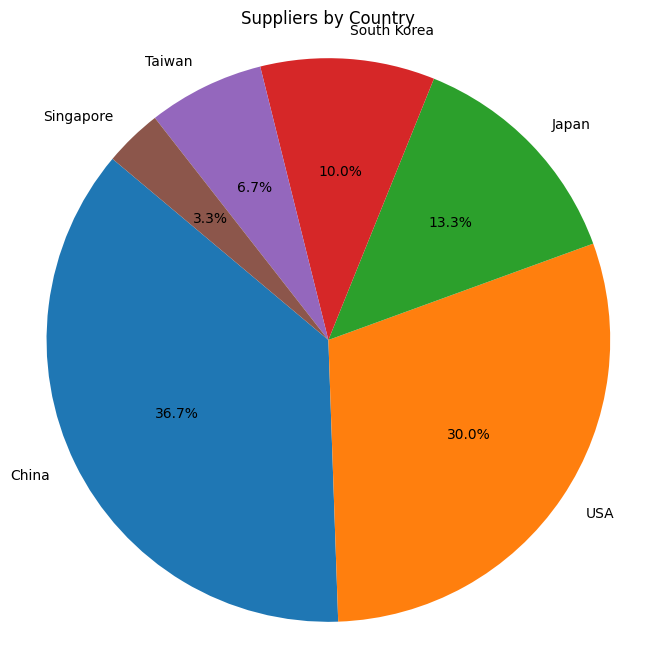

In [33]:
plt.figure(figsize=(8, 8))
supplier_count_by_country = s['Country'].value_counts()
plt.pie(supplier_count_by_country, labels=supplier_count_by_country.index, autopct='%1.1f%%', startangle=140)
plt.title('Suppliers by Country')
plt.axis('equal')
plt.show()


# גרף הזמנות חודשיות
גרף זה מציג את כמות ההזמנות החודשיות. הנתונים מסייעים להבין את מגמות ההזמנות לאורך זמן.


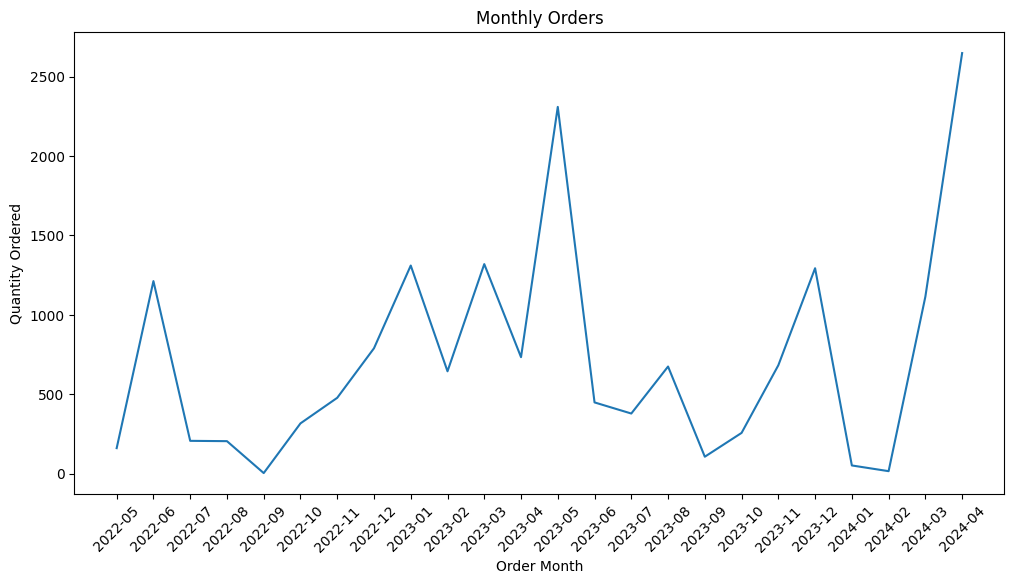

In [34]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_orders, x='OrderMonth', y='QuantityOrdered')
plt.title('Monthly Orders')
plt.xlabel('Order Month')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()



# גרף עלות ליחידה מול כמות חלקים
גרף זה מציג את הקשר בין העלות ליחידה לבין כמות החלקים. הנתונים מסייעים להבין את התפלגות המחירים והכמויות של החלקים השונים.


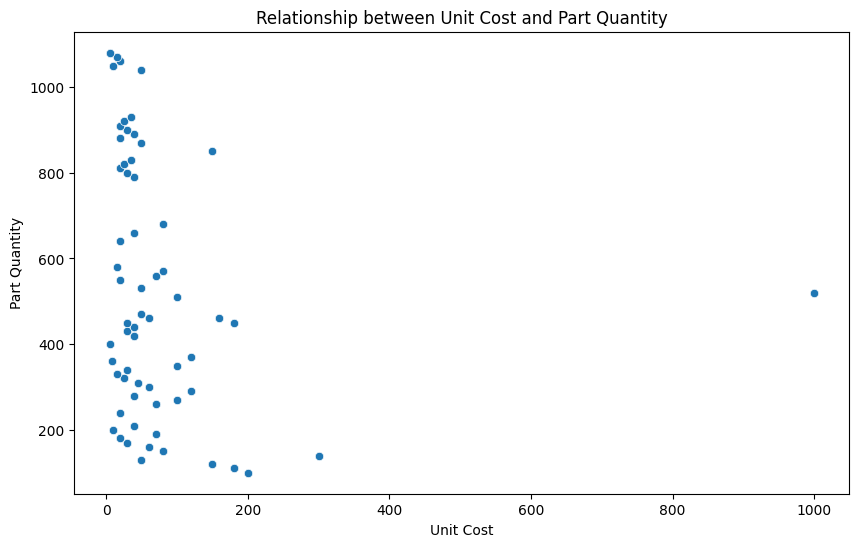

In [35]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pa, x='UnitCost', y='PartQuantity')
plt.title('Relationship between Unit Cost and Part Quantity')
plt.xlabel('Unit Cost')
plt.ylabel('Part Quantity')
plt.show()
